# Get started with dynamic circuits

Welcome to the documentation and tutorials for dynamic circuits! Dynamic circuits are quantum circuits (or programs!) with not just the ability to apply gates and measurements to your qubits, but also to apply operations that are conditional on classical computations and measurement results within the coherence time of your qubits. [Dynamic circuits](https://medium.com/qiskit/a-new-openqasm-for-a-new-era-of-dynamic-circuits-87f031cac49) are a critical component of the [IBM Quantum hardware roadmap](https://research.ibm.com/blog/ibm-quantum-roadmap-2025).

We aim to provide access to real-time classical control and compute integrated in a seamless way with your quantum algorithms. IBM Quantum computers support programming dynamic circuits with both [Qiskit](./dynamic-circuits-basics-with-qiskit) and [OpenQASM 3](./dynamic-circuits-basics-with-openqasm3). To see what features of OpenQASM 3 are currently supported in hardware, please see the [feature table here.](./feature-table)

Adding support for these new quantum hardware and software capabilities is a large effort that spans through Qiskit, the cloud, Qiskit Runtime, kernel-level compiler (more details coming soon!), hardware runtimes, and control systems. Development is still ongoing and feedback/discussion is encouraged in our Slack channel [#dynamic-circuits](https://qiskit.slack.com/archives/C03KWBJ7E68) in the [Qiskit workspace](http://ibm.co/joinqiskitslack). Development is happening at a rapid pace and we expect to incorporate feedback quickly.

<Admonition type="note">
  As we integrate new features and address feedback, changes may be rapid and possibly breaking.
</Admonition>

If you have a question, first visit the [FAQs](#faqs) and see if it has already been answered. If you can’t find the answer there, please ask in our Slack channel [#dynamic-circuits](https://qiskit.slack.com/archives/C03KWBJ7E68) in the [Qiskit workspace](http://ibm.co/joinqiskitslack).


## Set up

We will be using [Qiskit](https://qiskit.org/) throughout the tutorial.

This notebook will guide you through getting set up.

The tutorial notebooks live in [IBM Quantum Lab](https://quantum-computing.ibm.com/lab/files/qiskit-tutorials/dynamic-circuits/). You will need to have an IBM Quantum account to use the Quantum Lab. If you do not already have one, [sign up for an IBM Quantum account](https://quantum-computing.ibm.com/).

You can run these tutorials either in the cloud, or download them to run on your local machine.


### Option 1 - Local Machine

Log on to IBM Quantum Lab with your IBM Quantum account credentials.

Download the [Dynamic circuits notebooks](https://quantum-computing.ibm.com/lab/files/qiskit-tutorials/dynamic-circuits/), including the `figs/` directory.

Next, install Qiskit by following these [instructions](https://qiskit.org/documentation/getting_started.html).

*   Set up a Python virtual environment for the tutorial (good practice but not necessary).

*   Make sure you have have the latest Qiskit installed. *(`qiskit-terra>=0.22` and `qiskit-ibm-provider>=0.1.0`)*

    *   `pip install jupyter matplotlib scipy`

    *   `pip install qiskit --upgrade`

    *   To update qiskit-terra, run `pip install qiskit-terra -U`

    *   `pip install qiskit-ibm-provider`

*   Open up this notebook `"Getting-started-with-Dynamic-Circuits.ipynb"`, run to check your installation, and run your first OpenQASM 3 program on hardware.


### Option 2 - Quantum Lab

Open the tutorial in [Quantum Lab](https://quantum-computing.ibm.com/lab/files/qiskit-tutorials/dynamic-circuits/).

Please make sure to verify that your `qiskit-terra` version `>=0.22.0` and that you are using the latest `qiskit-ibm-provider` version.


In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

In [2]:
# Running checks for the correct dependencies
import qiskit
from packaging import version

if not(version.parse(qiskit.__qiskit_version__["qiskit-terra"]) >= version.parse("0.22")):
    print(
        "Incorrect dependencies. Found qiskit-terra: "
        + qiskit.__qiskit_version__["qiskit-terra"]
        + "\nNeed qiskit-terra >= 0.22"
    )

try:
    import qiskit_ibm_provider
except ModuleNotFoundError:
    print(
        "You must install the qiskit_ibm_provider with 'pip install qiskit_ibm_provider'"
    )
    raise

In [3]:
# Ignoring warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

The notebook is ready to run!


## Testing OpenQASM 3 support

Let's test out our installation by verifying we have access to the code and hardware necessary.

First, load our backend.

To view the simulators and systems supporting dynamic circuits that you can access, [click here (requires the user to be logged in to IBM Quantum)](https://quantum-computing.ibm.com/services/resources?tab=yours\&openqasm3=true).

**Note**: This can be *any* hub/group/project that has access to the required device and the Qiskit runtime and has OpenQASM 3 support


In [4]:
# Note: This can be any hub/group/project that has access to the required device and the Qiskit runtime.
hub = "<hub>"
group = "<group>"
project = "<project>"
backend_name = "<your backend>"
hgp = f"{hub}/{group}/{project}"

Next, we load our IBM Quantum account credentials.


In [7]:
import qiskit
from qiskit_ibm_provider import IBMProvider

# Save token if necessary
# IBMProvider.save_account(token='MY_API_TOKEN')

# Get our backend
provider = IBMProvider()
backend = provider.get_backend(backend_name, instance=hgp)

AccountNotFoundError: 'No default ibm_quantum account saved.'

Make sure to use any OpenQASM 3-enabled backend.


In [6]:
qasm3_backends = set(
    backend.name for backend in provider.backends(dynamic_circuits=True)
)

print(f"The following backends support dynamic circuits: {qasm3_backends}")

NameError: name 'provider' is not defined

Now we prepare our circuit.


In [7]:
qubit = 0
shots = 1000

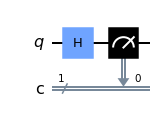

In [8]:
from qiskit import QuantumCircuit

h_qc = QuantumCircuit(1, 1, name="|+> Prep")
h_qc.h(0)
h_qc.measure(0, 0)
h_qc.draw(idle_wires=False, output="mpl")

Next, transpile our quantum circuit for the hardware basis gates.


In [4]:
from qiskit import transpile

h_qc_transpiled = transpile(h_qc, backend, initial_layout=[1])
h_qc_transpiled.draw(idle_wires=True, output="mpl")

NameError: name 'h_qc' is not defined

Now we submit our circuit to the backend to verify it is working.


Note that we have to set `dynamic=True` to communicate to the backend that we want to run a dynamic circuit.


In [10]:
job = backend.run(h_qc_transpiled, shots=shots, dynamic=True)
print(f"Your job's id: {job.job_id()}")
result = job.result()
print(f"|+> preparation results: {result.get_counts(0)}")

Your job's id: cdi1j0557v9vkk45o5cg
|+> preparation results: {'0': 506, '1': 494}


In [11]:
job.error_message()

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table

## Run a dynamic circuit

This tutorial introduces the current dynamic circuit support through Qiskit on IBM Quantum hardware.

Dynamic circuits are quantum circuits that contain mid-circuit measurements that affect the control flow of gate execution later in the circuit, otherwise known as feed-forward operations. The canonical and most simple example is conditional reset, where we perform a projective measurement of the qubit, and if the result is a 1, we flip the state using an X-gate from the $|1\rangle$ to the $|0\rangle$ state. If the result is a 0 we do nothing, as we are already in $|0\rangle$.

Dynamic circuit support requires significant changes to the hardware and software backends that execute quantum circuits, compared to traditional 'static' circuits. Many of IBM Quantum's hardware backends have been upgraded to support dynamic circuits. To view the simulators and systems supporting dynamic circuits that you can access, [click here (requires the user to be logged in to IBM Quantum)](https://quantum-computing.ibm.com/services/resources?tab=yours\&openqasm3=true). Support for dynamic circuits will continue to grow and improve in ease of use and efficiency.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

<Admonition type="note">
  Before running this notebook, make sure to the follow the [steps to get started](#get-started-with-dynamic-circuits), to verify you are set up to run dynamic circuit programs on IBM hardware.
</Admonition>


### Step 1: Load backend

Backends provide a handle to the quantum hardware instance. The main approach for running circuits will be to call `backend.run(<your circuit>, dynamic=True)`. Backends are obtained from the `IBMProvider` imported from `qiskit_ibm_provider`, and are specified by a system name along with the `hub/group/project` string that gives you access to that system.


In [ ]:
# Note: This can be any hub/group/project that has access to the required device and Qiskit Runtime.
hub = "<hub>"
group = "<group>"
project = "<project>"
backend_name = "<your backend>"
hgp = f"{hub}/{group}/{project}"

In [ ]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider()
backend = provider.get_backend(backend_name, instance=hgp)

**Load a simulator backend**

We can also use a simulator to simulate the behavior of dynamic circuits. We obtain a simulator backend similarly to a hardware backend.


In [ ]:
from qiskit import Aer
backend_sim = Aer.get_backend('aer_simulator')

### Step 2: Write a dynamic circuit with Qiskit

We start with a conditional reset circuit on a single qubit. We first try to excite the qubit with an X-gate followed by a  measurement, and another X-gate if the measurement returns a 1.

In older versions of Qiskit, limited conditional execution was supported using the `c_if()` construct. This was a function that all gate objects exposed, which allowed gate execution to be conditioned on the value of a classical register. A significant limitation was that only a single gate could be conditioned on the classical register value.

In contrast, the new style of classical control flow with the `if_test()` allows significantly more flexibility in the values that can be conditioned on and the sub-circuits that can be defined within the body of the `if_test()`. It also enables `else` conditions. More documentation on the `if_test()` is [available here](/api/qiskit/qiskit.circuit.QuantumCircuit#if_test).


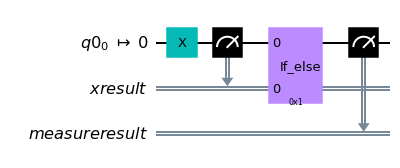

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile

qr = QuantumRegister(1)
crx = ClassicalRegister(1, name="xresult")
crm = ClassicalRegister(1, name="measureresult")
qc_reset = QuantumCircuit(qr, crx, crm, name="Reset")
qc_reset.x(0)
qc_reset.measure(0, crx)
# qc_reset.x(0).c_if(crx, 1) # old style conditional gate
with qc_reset.if_test((crx, 1)): # new style conditional block (more flexible)
    qc_reset.x(0)
qc_reset.measure(0, crm)

qc_reset = transpile(qc_reset, backend, initial_layout=[0])
qc_reset.draw(output="mpl", idle_wires=False)

### Step 3: Run conditional reset in a simulator

Running on the simulator is very similar to running on the hardware.


In [ ]:
reset_sim_job = backend_sim.run(qc_reset)
print(reset_sim_job.job_id())

fda596f0-0c54-4db0-9cf7-104f1f1bcd5c


In [ ]:
reset_sim_result = reset_sim_job.result()
reset_sim_counts = reset_sim_result.get_counts(0)
print(f"Full counts including reset: {reset_sim_counts}")

Full counts including reset: {'0 1': 1024}


### Step 4: Run conditional reset on hardware

Now we run our conditional reset program on the backend. We turn off the automatic qubit initialization provided by the backend so that we can examine the results of our reset program directly.


In [ ]:
reset_job = backend.run(qc_reset, dynamic=True, init_qubits=False) # Turn off automatic init
print(reset_job.job_id())

cdl97lvtlcfkm5f2pnb0


Let's understand the results:


In [ ]:
from qiskit.result import marginal_counts

reset_result = reset_job.result()
reset_counts = reset_result.get_counts(0)
mitigated_reset_results = marginal_counts(reset_counts, indices=[1])
print(f"Full counts including reset: {reset_counts}")
print(
    f"Results from our reset - |0>s prepared {mitigated_reset_results.get('0')}, |1>s prepared {mitigated_reset_results['1']}"
)

Full counts including reset: {'0 0': 87, '0 1': 3290, '1 0': 20, '1 1': 603}
Results from our reset - |0>s prepared 3377, |1>s prepared 623


### Step 5: Conditional Reset with OpenQASM 3

Another way to write the same circuit above is to use [OpenQASM 3](https://arxiv.org/abs/2104.14722), a quantum assembly language well-suited to describing dynamic circuits. The [live specification](https://openqasm.com/) provides full details. Qiskit provides support to directly convert `QuantumCircuit` objects into OpenQASM 3.0 strings.


In [ ]:
try:
    from qiskit import qasm3
except ImportError:
    print(
        "You likely do not have the latest version of Qiskit installed. Please install it to run this code"
    )
    raise


def dump_qasm3(circuit, backend=backend):
    return qasm3.Exporter(
        includes=[],
        basis_gates=backend.configuration().basis_gates,
        disable_constants=True,
    ).dumps(circuit)


qc_reset_qasm3 = dump_qasm3(qc_reset)
print(qc_reset_qasm3)

OPENQASM 3;
bit[1] xresult;
bit[1] measureresult;
x $0;
xresult[0] = measure $0;
if (xresult == 1) {
  x $0;
}
measureresult[0] = measure $0;



**Note:** The names of the classical registers (`xresult` and `measureresult`) in the `qasm3` string above are the same as those provided when the circuit was first constructed. These make the OpenQASM 3 string much more human-readable.


### Step 6: Submit an OpenQASM 3 string directly

It is also possible to submit an OpenQASM 3 string directly instead of a `QuantumCircuit` object.

This is useful when the `QuantumCircuit` does not yet support all of the semantics of OpenQASM 3. To see what features of OpenQASM 3 are currently supported in hardware, please see the [feature table here](./feature-table).

See [Dynamic circuits basics with OpenQASM 3](./dynamic-circuits-basics-with-openqasm3) for more information.

**Note**: We cannot use circuit merging when OpenQASM 3 source strings are submitted. In this case each OpenQASM 3 source will run individually.


In [ ]:
qasm3_job = backend.run(qc_reset_qasm3, dynamic=True)
print(qasm3_job.job_id())

cdl97rtf14jb6brio7q0


In [ ]:
print(qasm3_job.result().get_counts())

{'0': 110, '1': 2783, '10': 35, '11': 1072}


## FAQs

### General

#### Where should I ask further questions?

Ask your questions in the Slack channel [#dynamic-circuits](https://qiskit.slack.com/archives/C03KWBJ7E68) in the [Qiskit workspace](http://ibm.co/joinqiskitslack).

#### Whom is dynamic circuit support available to?

All users with access to backends that support this capability. Primarily, this is limited to **some** exploratory system clients. You can verify if backend support is available by filtering `provider.backends(dynamic_circuits=True)`. To view the simulators and systems supporting dynamic circuits that you can access, [click here (requires the user to be logged in to IBM Quantum)](https://quantum-computing.ibm.com/services/resources?tab=yours\&openqasm3=true).

#### What are the primary use cases for dynamic circuits?

Dynamic circuits are critical for algorithms such as quantum error correction (QEC). In general, there are broad classes of quantum algorithms that exchange quantum resources for classical resources to construct exotic quantum channels.

### Hardware platforms

#### What systems have support for dynamic circuits?

Any backend reporting support in the provider `provider.backends(dynamic_circuits=True)`.

#### Which systems will be supported?

Gradually support will be rolled out to most but not all deployed systems depending on control-system capabilities.

### Capabilities

#### Which gate types are supported?

Currently only direct drive single-qubit, and cross-resonance two-qubit gates are supported.

#### What circuit scheduling protocol is used on the backend?

The quantum circuit model only specifies the dependency graph for circuit operations that are applied to qubits. This means that the timing of circuit operations *is not fully constrained* unless the duration of all operations is known *a priori* and operations are applied within a program such that no qubits remain idle (including delays). To fully resolve this timing degree of freedom within a circuit, the compiler applies a *scheduling policy*. You may be familiar with [scheduling policies in Qiskit](https://qiskit.org/documentation/tutorials/circuits_advanced/07_pulse_scheduler.html).

Currently backends apply a default policy of ALAP (as-late-as-possible) scheduling.

```qasm

x $0;

delay[1s] $1;

bit result = measure $0;

```

Currently there are limitations on what portions of your program may be scheduled. See [below](#can-i-do-dynamical-decoupling) to learn more about these.

In the future we will support both scheduling procedures with the advent of the pulse dialect.

#### Can I do dynamical decoupling?

The full scheduling capabilities that are supported in Qiskit are not one-for-one available due to the implementation details of making measurement results available in real-time. You *can* schedule blocks of gates, and they will behave as expected up until a reset or control-flow (if/else/for/while) transition occurs, which will trigger a non-deterministic delay, followed by the next deterministic gating section.

For more information on how to use dynamical decoupling with dynamic circuits, see the [Dynamic Circuit scheduling support](https://qiskit.org/documentation/partners/qiskit_ibm_provider/stubs/qiskit_ibm_provider.transpiler.passes.scheduling.html#module-qiskit_ibm_provider.transpiler.passes.scheduling) in the Qiskit IBM Provider.

#### Are parametric programs supported?

These are not yet supported (although defined within the OpenQASM 3 language). Support will be coming in 2023.

#### Can I submit multiple circuits at once?

You can submit multiple circuits at once to the `qasm3-runner`. These will be merged into a single circuit for execution with reset sequences separating each circuit and result post-processing to separate out the individual circuit’s results.

#### Are single/two-qubit gates performed in parallel across qubits?

Yes.

#### Are measurements performed in parallel across qubits?

Yes, measurements that occur are independent when [topologically ordered](https://en.wikipedia.org/wiki/Topological_sorting) within a code-block are applied in parallel. For example:

```qasm

// In parallel

measure $0;

measure $1;



// In Parallel

measure $0;

x $2;

measure $1;

```

#### How are resets implemented?

All resets use a conditional reset implementation with a single round of measurement/gating. As these require a conditional operation, there is currently a synchronization of the hardware required at the end of the reset which has an indeterministic duration.

#### Do resets take the same time as other conditional logic in the hardware?

No, resets use a fast path in the hardware. In general, *any* `if` statement with a test condition depending directly on a qubit measurement result, with block contents containing only operations applied to the qubit generating the measurement result, will not require synchronization in between (after a short delay between the measurement end and the start of gating).

```qasm

// uses fast-path

bit result = measure $0;

if (result == 1){

    x $0;

}



// uses fastpath as decomposed to the above

// in the compiler

reset $0;



// does not use fast path

// however the result is already available

// from the previous synchronization above

// and no hardware synchronization is required

if (result == 1){

    x $0;

}



// does not use hardware fast-path

// as different qubits are used between

// measurement and gates. A global

// decision (slower) is instead required.

result = measure $0;

if (result == 1){

    x $1;

}

```

#### Do resets occur in parallel?

If the reset test conditions follow a parallel measurement, they will occur in parallel along the fast-path.

```qasm

// In parallel along fastpath

bit res0 = measure $0;

bit res1 = measure $1;



if (res0 == 1) {

    x $0;

}

if (res1 == 1) {

    rz(3.15) $1;

}



// Not in parallel along fastpath

// As the control-flow operations

// do not directly follow

// their measurement

bit res1 = measure $1;

barrier $1;

bit res0 = measure $0;



if (res1 == 1) {

    x $1;

}

if (res0 == 1) {

    rz(3.15) $0;

}

```

#### Are my qubits initialized for me?

Yes, see the Qiskit IBM Provider documentation for [available run options](https://qiskit.org/documentation/partners/qiskit_ibm_provider/stubs/qiskit_ibm_provider.IBMBackend.run.html#qiskit_ibm_provider.IBMBackend.run).

#### Are nested measurements in control-flow possible?

Yes, you are able to use measurements within control-flow to conditionally measure gates and apply conditional operations based on the measurement outcome. Currently you cannot retrieve the measurement result of conditional measurements; this will be resolved in 2023.

#### The circuit quality of my dynamic circuits are worse than through the standard Qiskit path.

This could be a bug! Please report it to the [#dynamic-circuits Slack channel](https://qiskit.slack.com/archives/C03KWBJ7E68) in the [Qiskit workspace](http://ibm.co/joinqiskitslack).

#### Will hardware support OpenQASM 3 floating point types?

Initially, real-time floating point types will not be supported. When support is added, it will begin will constant floating types, which may be handled at compile time. If real-time support is added, classical calculations involving floats will be slow, as it will be necessary to use soft math. Initially, real-time floats will likely be used as inputs to gate arguments, such as in the case of measurement-dependent rotation angles.

### OpenQASM 3

#### Where can I learn more about OpenQASM 3?

See the [specification](https://openqasm.com/) and [the white paper](https://arxiv.org/abs/2104.14722).

#### What OpenQASM 3 capabilities are currently supported?

See the [feature table](./feature-table) page for more information.

#### Why does the backend not support OpenQASM 3 with non-physical qubits, gate definitions, scheduling, etc.?

OpenQASM 3 was designed conceptually as a [multi-level IR](https://arxiv.org/abs/2104.14722). The backend compiler is designed to accept input that is specified at the last layer of this IR (the physical layer) and is designed to work on physical quantum circuits. It is more akin to a quantum assembler (e.g., to execute as faithfully as possible the program you specify) for a quantum computer and its control systems - not a full-fledged language compiler. To that end, it is designed to work with Qiskit/other intermediate quantum optimization toolchains that may target it as output and know that what they emit is what will be executed. For now we would recommend optimizing your circuits first in Qiskit with its transpiler to lay out the circuit for the target basis gates and coupling map.

#### Can I use pulse with OpenQASM 3?

No, the pulse support development is in progress. This will support gate calibrations in the presence of control-flow in a scalable and expressible way. The user interface from OpenQASM will be based on the [OpenPulse Grammar](https://openqasm.com/language/openpulse.html).

#### Can I submit textual OpenQASM 3 programs instead of Qiskit circuits?

Yes, see [Dynamic Circuits basics with OpenQASM 3](./dynamic-circuits-basics-with-openqasm3).

#### How must OpenQASM 3 source programs be structured?

Input OpenQASM 3 source programs have these limitations:

*   All operations must use physical qubits, eg., `cx $0, $1;`.

*   No symbolic algebra is supported, e.g., `pi/2`.

*   Must only use the backend’s basis gates (use the Qiskit transpiler to perform this conversion).

*   Limited capabilities are [supported](#what-openqasm-3-capabilities-are-currently-supported).

#### Are barriers being parsed properly from Qiskit down to the hardware?

Yes.

#### Are delays being parsed properly from Qiskit down to the hardware?

Yes, delays on qubits are currently supported with units of `dt`, `us`, `ms` and `s`.

#### Will every identical classical operation take the same amount of time in a circuit?

It is reasonable to assume that the same classical condition will take the same amount of time to evaluate, on average, when it occurs multiple times in the circuit. While the control system is deliberately designed to reduce them, there are still sources of (small) nondeterminism, so that the actual execution time may differ slightly between each occurrence.

#### Is there a way to find out after the fact how long each fast-forward operation took?

There is currently no mechanism to gather that information from Qiskit. We can collect timing information for a limited scope, ie., there is not the capability to record an entire execution, but only a small section of one. This capability is limited to internal users.

### Qiskit

#### Why are classical capabilities limited in Qiskit?

Qiskit was not originally designed to support dynamic circuits. These features were initially tacked on, and an extensive re-design is currently in progress. Consequently, the user-facing APIs and transpiler support are limited. At times we may require the usage of specific Qiskit releases and/or Git branches to enable rapid development of new dynamic circuit capabilities.

#### How are results returned?

Results are currently returned through the standard Qiskit [result object](/api/qiskit/qiskit.result.Result). This does not necessarily align with the OpenQASM 3 [input/output model](https://openqasm.com/language/directives.html?#input-output), and work is underway to fix this.


## Dynamic circuits tutorials

Work through these interactive tutorials in IBM Quantum Learning:

*   [Quantum teleportation](https://learning.quantum-computing.ibm.com/tutorial/quantum-teleportation)

*   [Iterative phase estimation](https://learning.quantum-computing.ibm.com/tutorial/iterative-phase-estimation)

*   [Bit-flip repetition code](https://learning.quantum-computing.ibm.com/tutorial/bit-flip-repetition-code)

*   [Repeat until success](https://learning.quantum-computing.ibm.com/tutorial/repeat-until-success)
